# First attempt at building a neural network to classify metal lyrics by band

In [1]:
# import needed fastai modules
import fastai
import fastai.text

In [2]:
# gotta set up training and validation sets
# data all in data/ subdir of root project dir so check what pwd is first
%pwd

'/Users/eric/code/projects/metal-lyrics-classifier/notebooks'

In [3]:
# get all the files, then shuffle, first 80% is training, last 20% is testing
from random import shuffle
from pathlib import Path

root_data_dir = Path('../data/')
lyric_files = list(root_data_dir.glob('lyrics_*.txt'))

assert lyric_files

shuffle(lyric_files)

In [4]:
print(len(lyric_files))

642


In [6]:
train_set_size = round(0.80 * len(lyric_files))
train_set = lyric_files[:train_set_size]
valid_set = lyric_files[train_set_size:]
assert len(train_set) + len(valid_set) == len(lyric_files)

In [8]:
first_file = train_set[0]

In [13]:
first_file.parent / 'train'
first_file.parent / 'train' / first_file.name

PosixPath("../data/train/lyrics_dragonforce_you'renotalone.txt")

In [20]:
import shutil
import subprocess

train_set_dir = train_set[0].parent / 'train'
valid_set_dir = valid_set[0].parent / 'valid'

subprocess.call(['mkdir', train_set_dir, valid_set_dir])

for file in train_set:
    shutil.copy(file, train_set_dir)

for file in valid_set:
    shutil.copy(file, valid_set_dir)

In [21]:
root_dir_size = len(list(root_data_dir.glob('*.txt')))
train_set_size = len(list((root_data_dir / 'train').glob('*.txt')))
valid_set_size = len(list((root_data_dir / 'valid').glob('*.txt')))
print(train_set_size)
print(valid_set_size)
print(root_dir_size)
assert train_set_size + valid_set_size == root_dir_size

514
128
642


In [36]:
# for the classification model, the files have to be in subfolders with their classification
# so data/classification/train/ironmaiden, etc.

subprocess.call(['mkdir', '-p', '../data/classification/train', '../data/classification/valid'])

all_lyric_files = list(Path('../data/').glob('lyrics_*.txt'))
print(all_lyric_files[0].name.split('_'))
all_classes = {file.name.split('_')[1] for file in all_lyric_files}
print(all_classes)

for class_ in all_classes:
    subprocess.call(['mkdir', '-p', f'../data/classification/train/{class_}', f'../data/classification/valid/{class_}'])

for file in train_set:
    class_ = file.name.split('_')[1]
    shutil.copy(file, f'../data/classification/train/{class_}')

for file in valid_set:
    class_ = file.name.split('_')[1]
    shutil.copy(file, f'../data/classification/valid/{class_}')

['lyrics', 'ironmaiden', 'flightoficarus.txt']
{'ironmaiden', 'blindguardian', 'motörhead', 'manillaroad', 'judaspriest', 'dragonforce', 'rainbow', 'thinlizzy', 'blacksabbath', 'metallica', 'ledzeppelin', 'megadeth', 'manowar'}


In [39]:
lyrics_data_bunch = fastai.text.TextClasDataBunch.from_folder(path='../data/classification/')

In [40]:
lyrics_data_bunch.classes

['blacksabbath',
 'blindguardian',
 'dragonforce',
 'ironmaiden',
 'judaspriest',
 'ledzeppelin',
 'manillaroad',
 'manowar',
 'megadeth',
 'metallica',
 'motörhead',
 'rainbow',
 'thinlizzy']

In [41]:
lyrics_data_bunch.save()

In [42]:
lyrics_data_bunch.path

PosixPath('/Users/eric/code/projects/metal-lyrics-classifier/notebooks/../data/classification')

In [43]:
lyrics_data_bunch.show_batch()

text,target
"xxbos xxmaj turn your head and see the fields of flame \n \n xxmaj he carries along \n xxmaj from a distant place , he 's on his way \n xxmaj he 'll bring decay \n ( xxmaj do n't move along cause things they will go wrong \n xxmaj the end is getting closer day by day ) \n xxmaj in shades of",blindguardian
"xxbos ( xxmaj xxunk ) \n \n i xxup hector xxup xxunk xxup the xxup wall \n xxmaj see my chariot , run to your ships \n i 'll drive you back to the sea \n xxmaj you came here for gold , the wall will not hold \n xxmaj this day was promised to me \n xxmaj the xxmaj gods are my shield",manowar
"xxbos xxmaj hear the xxunk of the ancient mariner \n xxmaj see his eye as he stops one of three \n xxmaj xxunk one of the wedding xxunk \n xxmaj stay here and listen to the nightmares of the sea \n \n xxmaj and the music plays on , as the bride passes by \n xxmaj caught by his spell and the mariner tells his",ironmaiden
"xxbos [ xxmaj verse 1 ] \n xxmaj are you a man of peace , or a man of holy war ? \n xxmaj too many xxunk to you , do n't know which anymore \n xxmaj so many full of life , but also filled with pain \n xxmaj do n't know just how many will live to breathe again \n \n a life",ironmaiden
"xxbos [ xxmaj verse 1 ] \n xxmaj in my time of dying \n i want nobody to mourn \n xxmaj all i want for you to do \n xxmaj is take my body home \n \n [ xxmaj chorus ] \n xxmaj well , well , well \n xxmaj so i can die easy \n xxmaj well , well , well",ledzeppelin


In [45]:
learner = fastai.text.learner.text_classifier_learner(lyrics_data_bunch, fastai.text.models.AWD_LSTM, drop_mult=0.5)

In [48]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-02


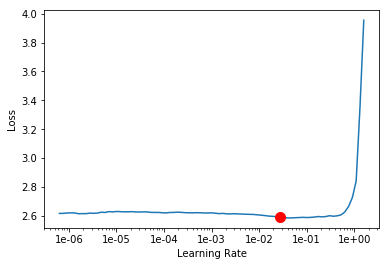

In [49]:
learner.recorder.plot()

In [50]:
learner.fit_one_cycle(1, 2.75e-02)

epoch,train_loss,valid_loss,accuracy
1,2.624390,2.567732,0.062500


In [51]:
learner.save('first_1_epoch_with_10_bands')

In [52]:
learner.fit_one_cycle(1, 2.75e-02)

epoch,train_loss,valid_loss,accuracy
1,2.595696,2.561410,0.109375


In [53]:
learner.save('second_1_epoch_with_10_bands')

In [54]:
learner.fit_one_cycle(1, 2.75e-02)

epoch,train_loss,valid_loss,accuracy
1,2.510027,2.573487,0.101562


# Takeaway

Wow, this isn't very good!

Couple ideas:

1. Train on a more powerful machine.
2. Get larger data set.
3. Get more classes.